# Predicting Success of Telemarketing  - Summer 2020


Presented by- **Anushri More**

## Description of Bank-Marketing data
Source: S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. _Decision Support Systems,_ Elsevier, 62:22-31, June 2014


### Data Set Information:

The data is shows direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to determine if the product (bank term deposit) would be purchased/subscribed ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


### Attribute Information:

**Input variables:**<br/><br/>
_(bank client data):_
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')<br/><br/>
_(variables related with the last contact of the current campaign:)_<br/><br/>
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br/><br/>
_(other attributes:)_<br/><br/>
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br/><br/>
_(social and economic context attributes)_<br/><br/>
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


### Relevant Papers:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. _Decision Support Systems,_ Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]



### Citation Request:

This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
Please include this citation if you plan to use this database: 

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. _Decision Support Systems,_ Elsevier, 62:22-31, June 2014

####**Project Summary**



*   Problem Statement 
*   Data Preprocessing 
*   Exploratory Data Analysis
*   Model
*   Model Perfromance 
*  Conclusion








#### **1. Problem Statement**

We are given the data of direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (target variable y).This is a binary classification problem. Our two classes are “yes” denoting that the customer subscribed to a term deposit, and “no” denoting that the customer did not subscribe

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded=files.upload()  # When this cell is executed, a "Choose File" button will appear. Click on this button and load the banking.csv file from your local directory.

Saving banking.csv to banking (1).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "banking.csv" with length 4882918 bytes


In [ ]:
# Importing all the required  python modules
import io
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import SGDClassifier 



In [ ]:
#read in data
data = pd.read_csv(io.StringIO(uploaded['banking.csv'].decode('utf-8')))

In [ ]:
# Since there are missing values in this dataset, we will first clean the data.
data = data.dropna()

In [ ]:
# Let's see if it worked:
data.isnull().sum()

# In the output below, we should see '0' missing values for each of the variables.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
#check on the dimensions of the data
data.shape

(41188, 21)

In [ ]:
#What are the variables called?
list(data.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

##Instructions
Here are your instructions:
1.  Explore alternative machine-learning algorithms (logistics, SVM, Deep learning) that will allow you to successfully predict which customer would be most susceptible to the marketing campaign.
2.  Compare the relevative predictive power of the various models. (i.e., which is better)

As was the case with the first collaborative assignment, feel free to explore the data and analyze the data in as much detail as you can.  Creativity in your exploration will be rewarded.

Include an __Executive Summary__ at the beginning of your notebook highlighting what you found.

Include the names of your group members in your notebook.

Submit your results to me with an uploaded notebook and  GIST code. As insurance, mail the notebook to me.

In [ ]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### **Exploratory Data Analysis**

**Plot1-Distribution of class variable:**

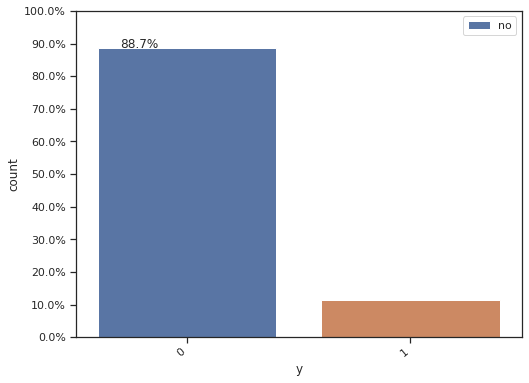

In [ ]:
plt.figure(figsize=(8,6))

Y = data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  ax.legend(labels=["no","yes"])
  plt.show()

Observation :- The dataset we are working with is an imbalanced dataset with the class “no” being the majority class. If we use accuracy as our metric, any random model can give us a very good accuracy.

While deciding the performance metrics we should not use accuray as a performance measure.

In [ ]:
print(data["y"].value_counts())

0    36548
1     4640
Name: y, dtype: int64


Interpretation :- We can see from the above plot that the dataset in imbalanced, where the number of negative class is close to 8 times the number of positive class.

**Univariate analysis of Categorical variables:**

In [ ]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [ ]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

**Plot-2**

Job: The type of job the customers have. Let’s call the count plot function defined earlier to plot the count plot of the job feature.

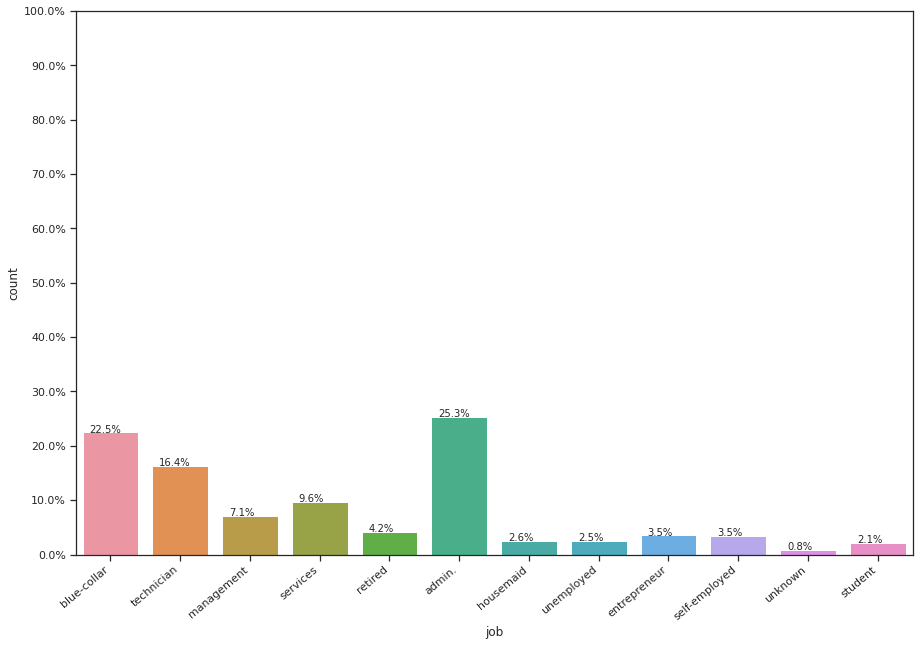

In [ ]:
countplot("job", data)

Interpretation: In the given dataset, 25 % of cadidates are admin are 22 % cadidates are blue collared.

Plot-3

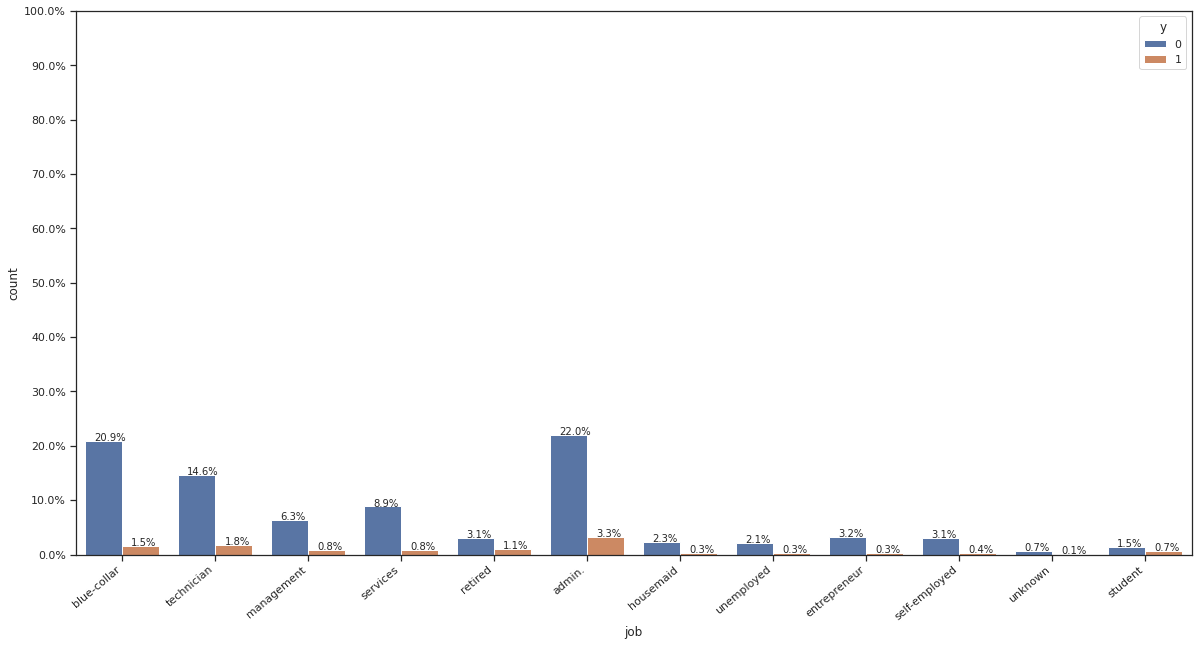

In [ ]:
countplot_withY("job", data)

Interpretation :-As the data set contained maximum admins and blue-collared,almost all of them subscribed to a term deposit.Hence if the candidate is admin or blue-collared then there is high chance that he/she might subscribed to a term deposit.

**Plot-4**

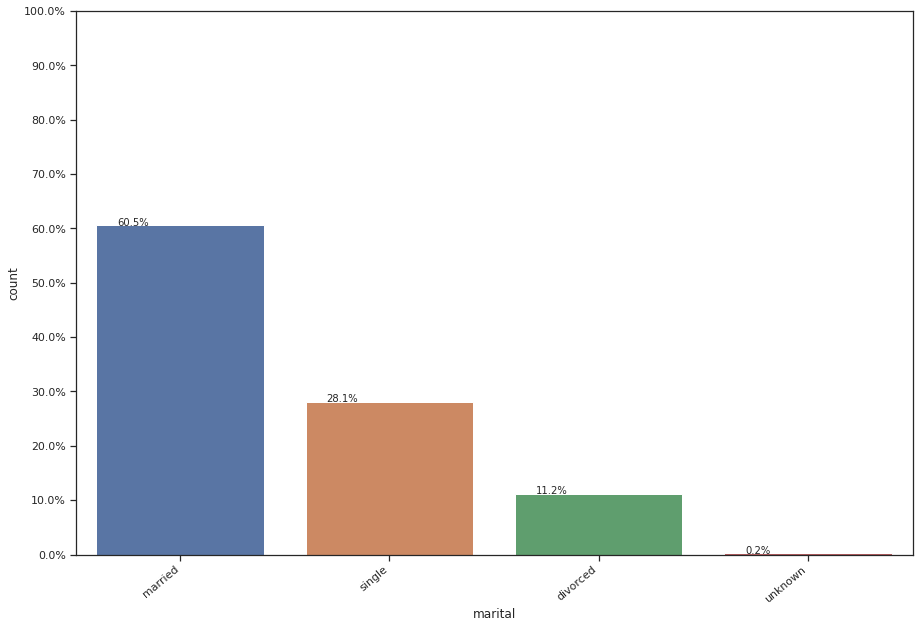

In [ ]:
countplot("marital", data)

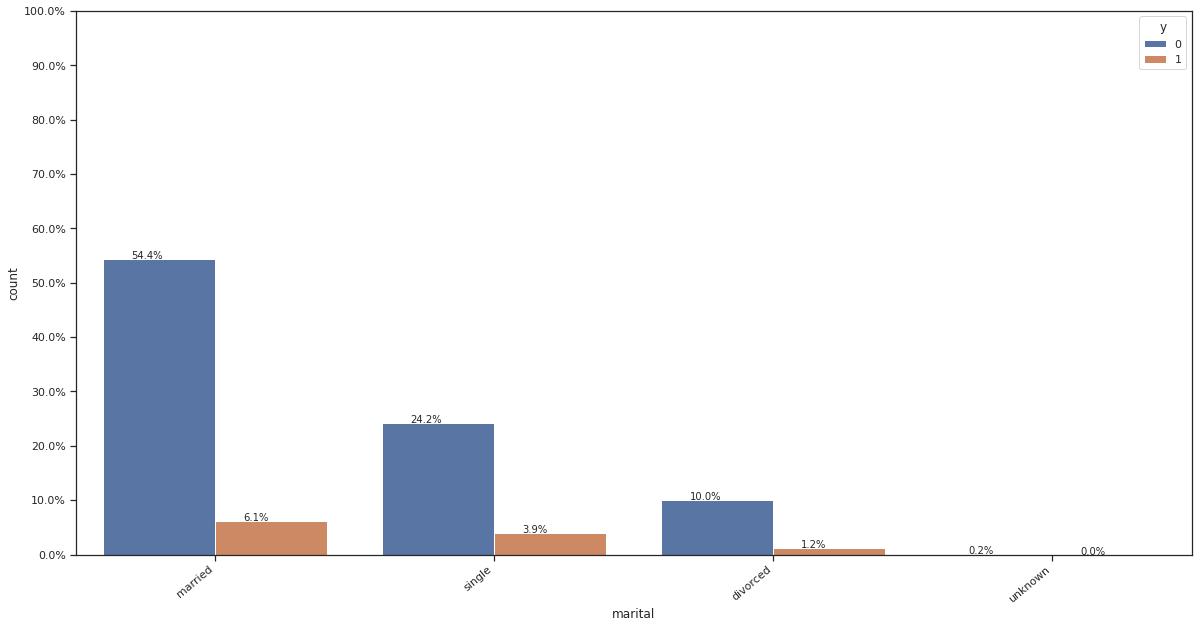

In [ ]:
countplot_withY("marital", data)

Interpretation:- If the cadidate is married, there is high chance that he/she might subscribed to a term deposit.

**Plot-5**

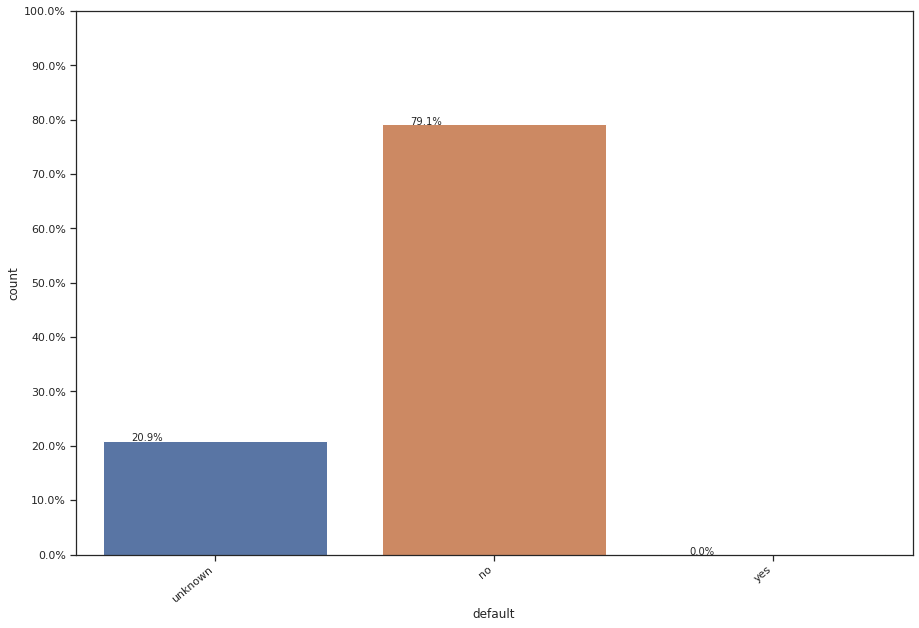

In [ ]:
countplot("default", data)

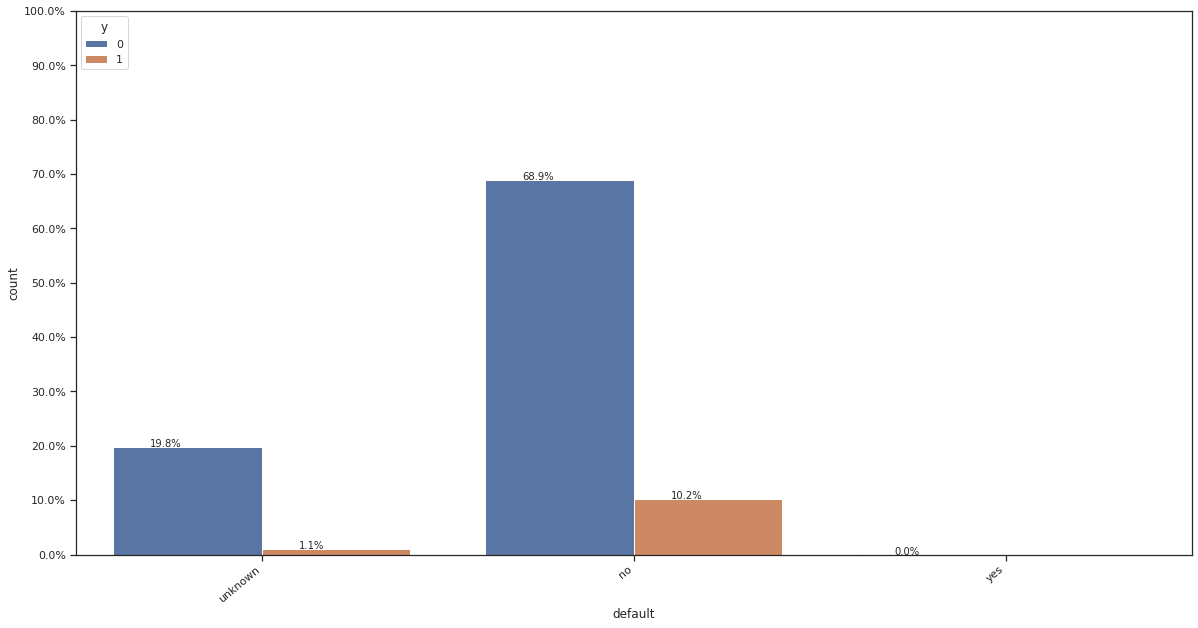

In [ ]:
countplot_withY("default", data)

Interpretation :- There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

**Plot-6**

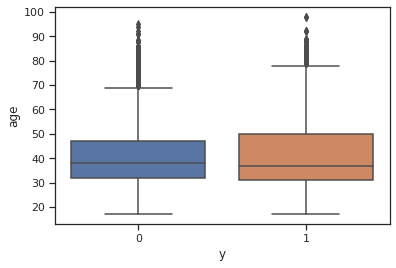

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

Interpretation :- The agegroup of candidates are in 30 to 50 years and there age is not an affecting factor for the decision of subscription to a term deposit.

Plot-7- Correlation Plot

Text(0.5, 1.05, 'Pearson correlation of Features')

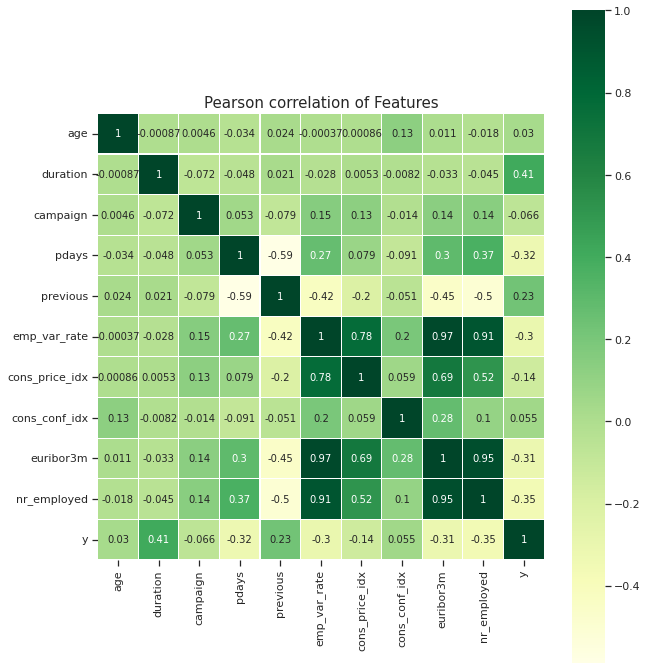

In [ ]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.


#### **Data Preprocessing**



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
## Getttign list of columns basd o data type
cat_columns=[]
num_columns=[]
for col in data.columns:
    if data[col].dtype=='object':
      print("Unique value in {}:{}".format(col,data[col].nunique()))
      #print(data[col].dtype,col,data[col].unique())
      cat_columns.append(col)

    else:
      num_columns.append(col)


Unique value in job:12
Unique value in marital:4
Unique value in education:8
Unique value in default:3
Unique value in housing:3
Unique value in loan:3
Unique value in contact:2
Unique value in month:10
Unique value in day_of_week:5
Unique value in poutcome:3


**List of categorical columns**

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

**List of numerical columns**

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

##### **One Hot Encoding Categorical features**

This is one of the most popular encoding schemes to deal with the categorical features. For each unique category it creates a separate column with binary values (0 or 1). In each of these new columns there is a value of 1 if the corresponding category is present in this row and 0 otherwise.

In [ ]:
#import Label Encoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in data.columns:
    if data[column].dtype == object:
        if data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            data[column] = le.fit_transform(data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = data,columns = dummy_columns) 

#### **Model Development**

In [ ]:
## Traaining features and target values 

X = df_data.drop(['y'],axis=1)
y = df_data.y


In [ ]:
## With duration column
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


## Without duration column
X_train_nd = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)
X_test_nd = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)




The shape of the train dataset:  (32950, 62)
The shape of the test dataset:  (8238, 62)


### **Model Pipeline**

For every model that we are going to create from hereafter, we will be performning following steps. 


We will create 2 models for each machine learning algorithm.


1.**Benchmark model** (with duration column)

2.**Realistic predictive model**(without duration column)


As mentioned the problem statement 
The duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



**Step-1**
In the Benchmark model we will use "Duration" feature to see how the model performs with this feature. It will probably give very high ROC/AUC as the duration feature is very correlated with the target variable. But obviously we can't use the Duration feature for actual modelling.


**Step-2**
In the next step for Realistic predictive model we will remove the "Duration" feature, and apply the same model to check how the model performs.

**Performance Metric Used:**
As we know, the given dataset is an imbalanced data and we should use accuracy as a perfronce mentric, thus we decided to use something that gives impoartance to true positive rate.
The performance metric used for this case study is AUC ROC score also known as AUROC (Area Under the Receiver Operating Characteristics).

Why use AUC?

The reason we are choosing AUC over accuracy is because,
as we will see in Exploratory data analysis, the dataset we are working with is an imbalanced dataset with the class “no” being the majority class. 
AUC gets over this problem by looking into both the True positive rate (TPR) and False positive rate (FPR). Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. Accuracy does not guarantee that.

**Model-1 : Applying Logistic Regression with 
“Duration” feature**

In [ ]:
### Logistics Regression  with duration column
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve

model1=LogisticRegression(penalty='l2',C=0.01,class_weight='balanced',max_iter=100,solver='lbfgs')
model1.fit(X_train,y_train)
y_pred_proba = model1.predict_proba(X_test)[::,1]
print ("The AUC is:",roc_auc_score(y_test,y_pred_proba)) #[:,1]

The AUC is: 0.9240943512930674


Model-1 ROC curve

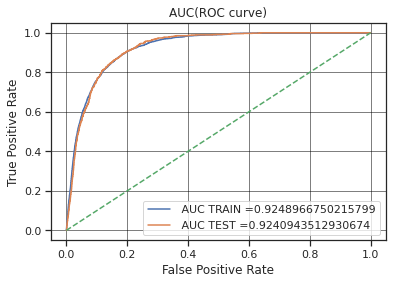

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test_pred = model1.predict_proba(X_test)[::,1]
y_train_pred = model1.predict_proba(X_train)[::,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Model-2 : Applying Logistic Regression without “Duration” feature**



In [ ]:
### Logistics Regression  with duration column
import warnings
warnings.filterwarnings('ignore')
model2=LogisticRegression(penalty='l2',C=0.01,class_weight='balanced')
model2.fit(X_train_nd,y_train)

predict_y = model2.predict(X_test_nd)
y_pred_proba = model2.predict_proba(X_test_nd)[::,1]
print ("The AUC is:",roc_auc_score(y_test,y_pred_proba)) #[:,1]

The AUC is: 0.7779476057120137


Model-2 ROC curve

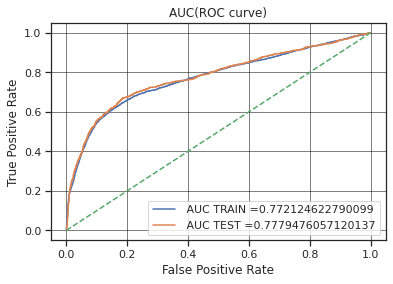

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test_pred = model2.predict_proba(X_test_nd)[::,1]
y_train_pred = model2.predict_proba(X_train_nd)[::,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Model-3 : Applying Neural Network with “Duration” feature**

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=62))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist3 = model3.fit(X_train,y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
2636/2636 [==============================] - 8s 3ms/step - loss: 3.6806 - accuracy: 0.8633 - val_loss: 0.7543 - val_accuracy: 0.8697
Epoch 2/10
2636/2636 [==============================] - 6s 2ms/step - loss: 0.9821 - accuracy: 0.8720 - val_loss: 0.8737 - val_accuracy: 0.9042
Epoch 3/10
2636/2636 [==============================] - 7s 3ms/step - loss: 0.5196 - accuracy: 0.8827 - val_loss: 0.4813 - val_accuracy: 0.8929
Epoch 4/10
2636/2636 [==============================] - 6s 2ms/step - loss: 0.3034 - accuracy: 0.8934 - val_loss: 0.3963 - val_accuracy: 0.8918
Epoch 5/10
2636/2636 [==============================] - 7s 2ms/step - loss: 0.2416 - accuracy: 0.9019 - val_loss: 0.2248 - val_accuracy: 0.9076
Epoch 6/10
2636/2636 [==============================] - 7s 3ms/step - loss: 0.2245 - accuracy: 0.9028 - val_loss: 0.2413 - val_accuracy: 0.8945
Epoch 7/10
2636/2636 [==============================] - 6s 2ms/step - loss: 0.2174 - accuracy: 0.9037 - val_loss: 0.2097 - val_accuracy:

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8064      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 24,705
Trainable params: 24,705
Non-trainable params: 0
_________________________________________________________________


Model-3 ROC curve

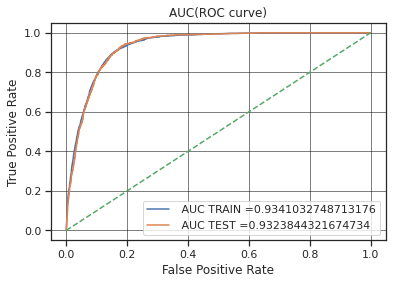

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test_pred = model3.predict(X_test)
y_train_pred = model3.predict(X_train)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

[]

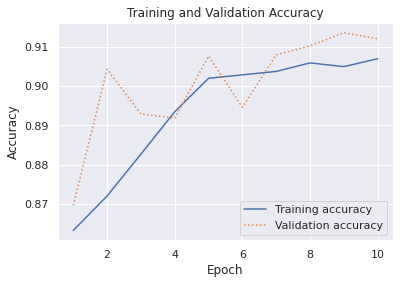

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist3.history['accuracy']
val = hist3.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

**Model-4 : Applying Neural Network without “Duration” feature**

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_dim=61))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist4 = model4.fit(X_train_nd,y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
2636/2636 [==============================] - 7s 3ms/step - loss: 4.7565 - accuracy: 0.8265 - val_loss: 1.9579 - val_accuracy: 0.8991
Epoch 2/10
2636/2636 [==============================] - 6s 2ms/step - loss: 1.2238 - accuracy: 0.8428 - val_loss: 1.4869 - val_accuracy: 0.3669
Epoch 3/10
2636/2636 [==============================] - 6s 2ms/step - loss: 0.6829 - accuracy: 0.8580 - val_loss: 0.3045 - val_accuracy: 0.8945
Epoch 4/10
2636/2636 [==============================] - 6s 2ms/step - loss: 0.4459 - accuracy: 0.8764 - val_loss: 0.3401 - val_accuracy: 0.8874
Epoch 5/10
2636/2636 [==============================] - 7s 3ms/step - loss: 0.3477 - accuracy: 0.8922 - val_loss: 0.2932 - val_accuracy: 0.8991
Epoch 6/10
2636/2636 [==============================] - 6s 2ms/step - loss: 0.3170 - accuracy: 0.8936 - val_loss: 0.2964 - val_accuracy: 0.8991
Epoch 7/10
2636/2636 [==============================] - 6s 2ms/step - loss: 0.3059 - accuracy: 0.8953 - val_loss: 0.3341 - val_accuracy:

Model-4 ROC curve

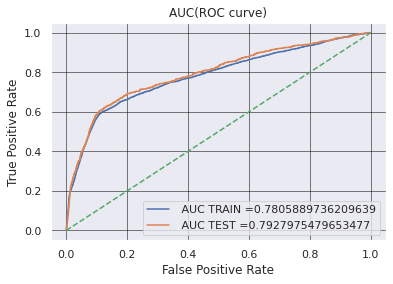

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test_pred = model4.predict(X_test_nd)
y_train_pred = model4.predict(X_train_nd)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

[]

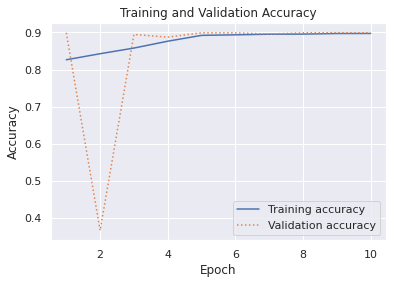

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist4.history['accuracy']
val = hist4.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

**Model-5 : Applying Linear SVM with “Duration” feature**

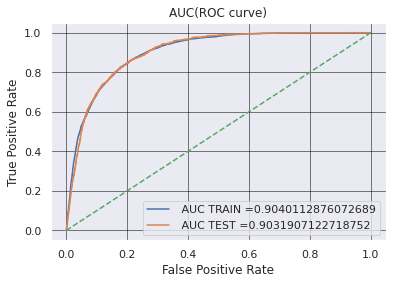

In [ ]:
model5 = SGDClassifier(penalty='l2', alpha=0.1, class_weight='balanced')
model5.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(model5, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_test = sig_clf.predict_proba(X_test)
predict_train = sig_clf.predict_proba(X_train)


y_test_pred=predict_test[:,1]
y_train_pred = predict_train[:,1]
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Model-6 : Applying Linear SVM without “Duration” feature**

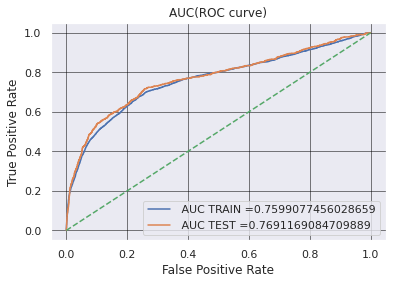

In [ ]:
model6 = SGDClassifier(penalty='l2', alpha=0.1, class_weight='balanced')
model6.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(model5, method="sigmoid")
sig_clf.fit(X_train_nd, y_train)
predict_test = sig_clf.predict_proba(X_test_nd)
predict_train = sig_clf.predict_proba(X_train_nd)


y_test_pred=predict_test[:,1]
y_train_pred = predict_train[:,1]
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### **Comparing Model Perfromance**

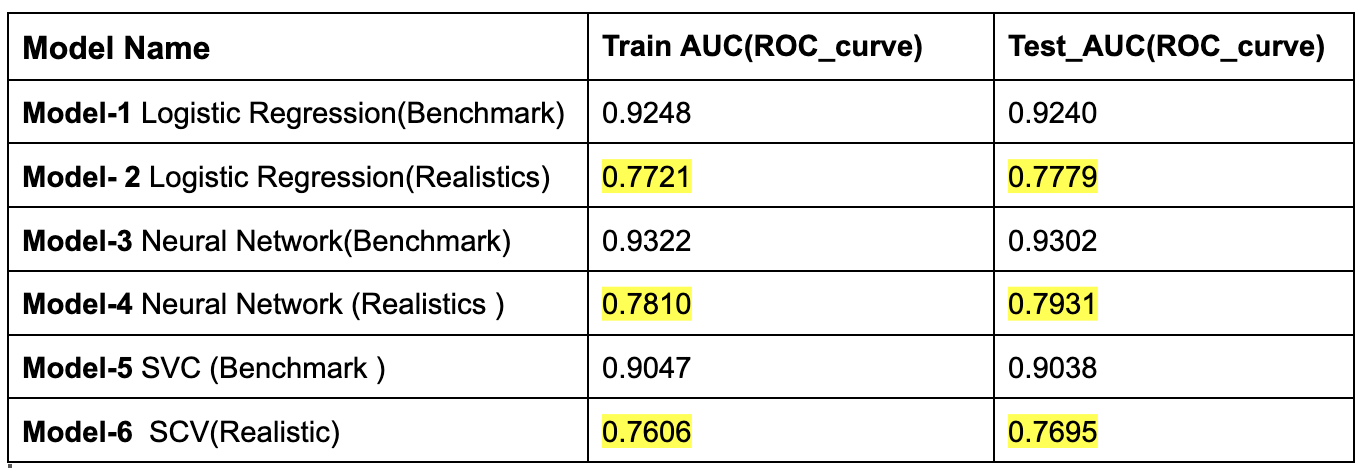

### **Conclusion**

**Best performing model** 

The realistic predictive model(without duration feature) - Neural Network with 2 hidden layer,sigmoid output activation function having adam optimiser
 has AUC value close to **0.80**.The model stable is and not overfitted because after 10th epoch validation and train accuracy is equaly constant.

**Key features with most importance:**
The top 3 key features or attributes that helped in the prediction of the class variable were:
1. nr.employed
2. euribor3m
3. emp.var.rate

Other than these 3 cons.price.idx and the categorical feature month and poutcome were also held a lot of importance in our case study